In [2]:
import cv2 as cv

img0 = cv.imread('assets/0.jpg')
img1 = cv.imread('assets/1.jpg')
img2 = cv.imread('assets/2.jpg')
img3 = cv.imread('assets/3.jpg')
img4 = cv.imread('assets/4.jpg')

v_img = cv.hconcat([img0,img1,img2,img3,img4])
cv.imwrite('out11.png', v_img)

True

In [3]:
img5 = cv.imread('assets/5.jpg')
img6 = cv.imread('assets/6.jpg')
img7 = cv.imread('assets/7.jpg')
img8 = cv.imread('assets/8.jpg')
img9 = cv.imread('assets/9.jpg')

v_img1 = cv.hconcat([img5,img6,img7,img8,img9])
cv.imwrite('out12.png', v_img1)

True

In [5]:
img_r1 = cv.imread('out11.png')
img_r2 = cv.imread('out12.png')
h_img = cv.vconcat([img_r1, img_r2])
cv.imwrite('final.png', h_img)

True

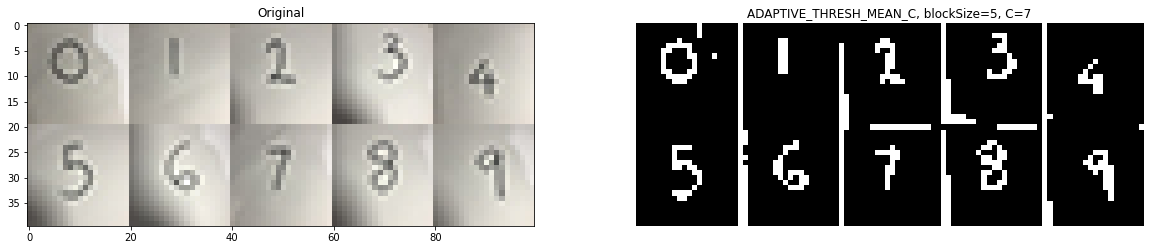

True

In [121]:
import cv2 as cv 
import matplotlib.pyplot as plt 

# file path
imgPath = 'final.png'
img = cv.imread(imgPath)

# Convert to grayscale 
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

imgGrayF = cv.bilateralFilter(imgGray,  5, 25, 25)

maxval = 255
blockSize = 5
C = 7
thresh_img = cv.adaptiveThreshold(imgGrayF, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, blockSize=blockSize, C=C)

# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)


plt.figure(figsize=(20,20))
imgRGB = img[:,:,::-1]
plt.subplot(221)
plt.title("Original")
plt.imshow(imgRGB)


plt.subplot(222)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

plt.show()

cv.imwrite('final_1.png', thresh_img)


In [115]:
import cv2 as cv

img0 = cv.imread('assets/00.png')
img1 = cv.imread('assets/11.png')
img2 = cv.imread('assets/22.png')
img3 = cv.imread('assets/33.png')
img4 = cv.imread('assets/44.png')

v_img = cv.hconcat([img0,img1,img2,img3,img4])
cv.imwrite('outp1l.png', v_img)

True

In [116]:
import cv2 as cv

img5 = cv.imread('assets/55.png')
img6 = cv.imread('assets/66.png')
img7 = cv.imread('assets/77.png')
img8 = cv.imread('assets/88.png')
img9 = cv.imread('assets/99.png')

v_img = cv.hconcat([img5,img6,img7,img8,img9])
cv.imwrite('outp2l.png', v_img)

True

In [122]:
img_r1 = cv.imread('/Users/azureennaja/Desktop/Perantis/cv-master/essential/outp1l.png')
img_r2 = cv.imread('/Users/azureennaja/Desktop/Perantis/cv-master/essential/outp2l.png')
h_img = cv.vconcat([img_r1, img_r2])
cv.imwrite('final2.png', h_img)

True

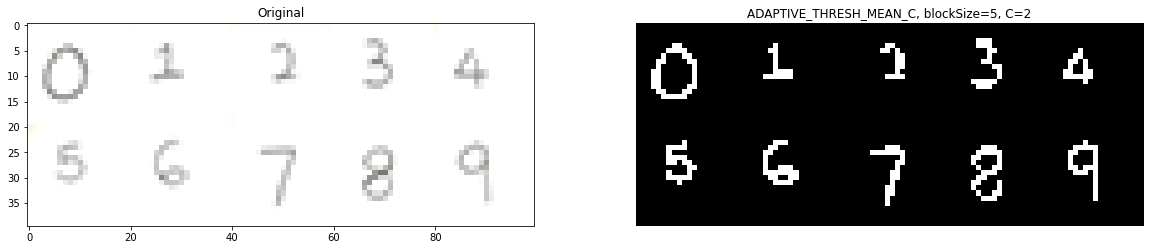

True

In [151]:
import cv2 as cv 
import matplotlib.pyplot as plt 

# file path
imgPath = 'final2.png'
img = cv.imread(imgPath)

# Convert to grayscale 
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

imgGrayF = cv.bilateralFilter(imgGray,  5, 25, 25)

maxval = 255
blockSize = 5
C = 2
thresh_img = cv.adaptiveThreshold(imgGrayF, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, blockSize=blockSize, C=C)

# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)


plt.figure(figsize=(20,20))
imgRGB = img[:,:,::-1]
plt.subplot(221)
plt.title("Original")
plt.imshow(imgRGB)


plt.subplot(222)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

plt.show()

cv.imwrite('final_2.png', thresh_img)


In [160]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '../samples/data/digits.png'
imgGray = cv.imread(filename, cv.IMREAD_GRAYSCALE)

print(imgGray.shape)

#### get all the digits
IMG_SIZE = 20

# Resize
rowNum = imgGray.shape[0] / IMG_SIZE
colNum = imgGray.shape[1] / IMG_SIZE

rows = np.vsplit(imgGray, rowNum)  #split each row first

digits = []
for row in rows:
    rowCells = np.hsplit(row, colNum)  #after splitting row, split each col 
    for digit in rowCells:
        digits.append(digit)   #each cell rep a particular digit

# convert list to np.array
digits = np.array(digits)
print('digits', digits.shape)

# labels
DIGITS_CLASS = 10
repeatNum = len(digits) / DIGITS_CLASS
labels = np.repeat(np.arange(DIGITS_CLASS), repeatNum)
print('labels', labels.shape)

#### get features
features = []
for digit in digits:
    img_pixel = np.float32(digit.flatten())  #flatten 20 by 20 pixel to 1D array of 400 pixel
    features.append(img_pixel)

features = np.squeeze(features)
print('features', features.shape)

# shuffle features and labels
# seed random for constant random value
rand = np.random.RandomState(321)
shuffle = rand.permutation(features.shape[0])
features, labels = features[shuffle], labels[shuffle]

# split into training and testing 
splitRatio = [2, 1]
sumRatio = sum(splitRatio)
partition = np.array(splitRatio) * len(features) // sumRatio
partition = np.cumsum(partition)

featureTrain, featureTest = np.array_split(features, partition[:-1])
labelTrain, labelTest = np.array_split(labels, partition[:-1])

print('featureTrain', featureTrain.shape)
print('featureTest', featureTest.shape)
print('labelTrain', labelTrain.shape)
print('labelTest', labelTest.shape)

# Train the KNN model:
print('Training KNN model')
knn = cv.ml.KNearest_create()
knn.train(featureTrain, cv.ml.ROW_SAMPLE, labelTrain)

# Test the created model:
k = 4
ret, prediction, neighbours, dist = knn.findNearest(featureTest, k)

# Compute the accuracy:
accuracy = (np.squeeze(prediction) == labelTest).mean() * 100
print("Accuracy when k=4: {}".format(accuracy))
print()

#### Test own handwriting:

filename1 = 'final_1.png'
imgGray1 = cv.imread(filename1, cv.IMREAD_GRAYSCALE)

print("Image shape:", imgGray1.shape)

#### get all the digits
IMG_SIZE1 = 20

# Resize
rowNum1 = imgGray1.shape[0] / IMG_SIZE1
colNum1 = imgGray1.shape[1] / IMG_SIZE1

rows1 = np.vsplit(imgGray1, rowNum1)  #split each row first

digits1 = []
for row1 in rows1:
    rowCells1 = np.hsplit(row1, colNum1)  #after splitting row, split each col 
    for digit1 in rowCells1:
        digits1.append(digit1)   #each cell rep a particular digit

# convert list to np.array
digits1 = np.array(digits1)
print('digits', digits1.shape)

# labels
DIGITS_CLASS1 = 10
repeatNum1 = len(digits1) / DIGITS_CLASS1
labelsT = np.repeat(np.arange(DIGITS_CLASS1), repeatNum1)
print('labels', labelsT.shape)

own_features = []
for digit1 in digits1:
    img_pixel1 = np.float32(digit1.flatten())  
    own_features.append(img_pixel1)

own_features = np.squeeze(own_features)
print('features', own_features.shape)

ret, prediction, neighbours, dist = knn.findNearest(own_features, k)

# Compute the accuracy:
accuracy = (np.squeeze(prediction) == labelsT).mean() * 100
print("Accuracy own handwriting: {}".format(accuracy))
print()


##### SECOND TEST

filename2 = 'final_2.png'
imgGray2 = cv.imread(filename2, cv.IMREAD_GRAYSCALE)

print("Image shape:", imgGray2.shape)

IMG_SIZE2 = 20

# Resize
rowNum2 = imgGray2.shape[0] / IMG_SIZE2
colNum2 = imgGray2.shape[1] / IMG_SIZE2

rows2 = np.vsplit(imgGray2, rowNum2)  #split each row first

digits2 = []
for row2 in rows2:
    rowCells2 = np.hsplit(row2, colNum2)  #after splitting row, split each col 
    for digit2 in rowCells2:
        digits2.append(digit2)   #each cell rep a particular digit

# convert list to np.array
digits2 = np.array(digits2)
print('digits', digits2.shape)

# labels
DIGITS_CLASS2 = 10
repeatNum2 = len(digits2) / DIGITS_CLASS2
labelsT2 = np.repeat(np.arange(DIGITS_CLASS2), repeatNum2)
print('labels', labelsT2.shape)

own_features2 = []
for digit2 in digits2:
    img_pixel2 = np.float32(digit2.flatten())  
    own_features2.append(img_pixel2)

own_features2 = np.squeeze(own_features2)
print('features', own_features2.shape)

ret, prediction, neighbours, dist = knn.findNearest(own_features2, k)

# Compute the accuracy:
accuracy = (np.squeeze(prediction) == labelsT2).mean() * 100
print("Accuracy own handwriting 2: {}".format(accuracy))
print()


(1000, 2000)
digits (5000, 20, 20)
labels (5000,)
features (5000, 400)
featureTrain (3333, 400)
featureTest (1667, 400)
labelTrain (3333,)
labelTest (1667,)
Training KNN model
Accuracy when k=4: 93.94121175764847

Image shape: (40, 100)
digits (10, 20, 20)
labels (10,)
features (10, 400)
Accuracy own handwriting: 10.0

Image shape: (40, 100)
digits (10, 20, 20)
labels (10,)
features (10, 400)
Accuracy own handwriting 2: 30.0

